# Analyse der Arbeitslosigkeit in Deutschland

## Ziel des Projekts

Ziel dieses Projekts ist die Analyse der Arbeitslosigkeit in Deutschland anhand offizieller Daten von Destatis.
Dabei werden sowohl die Arbeitslosenquote als auch die absolute Anzahl der Arbeitslosen untersucht,
um Trends und Zusammenhänge zu erkennen.


## Datensatz

- Quelle: Destatis (Statistisches Bundesamt)
- Zeitraum: 1992–2025
- Variablen:
  - Year – Jahr
  - Unemployment_Rate – Arbeitslosenquote (%)
  - Unemployed number – Absolute Anzahl der Arbeitslosen

In [192]:
import numpy as np

In [193]:
import pandas as pd
import matplotlib.pyplot as plt

In [194]:
df = pd.read_csv("arbeitslosigkeit_de.csv", sep=";")
df.head()


,Year,Unemployed number,Unemployed Rate %
0,1992,"2,978,570","7,7"
1,1993,"3,419,141","8,9"
2,1994,"3,698,057","9,6"
3,1995,"3,611,921","9,4"
4,1996,"3,965,064","10,4"


## Datenaufbereitung

Die numerischen Werte wurden bereinigt und in geeignete Datentypen umgewandelt, um eine korrekte Analyse zu ermöglichen.


In [195]:
df["Unemployed number"] = (
    df["Unemployed number"]
    .astype(str)
    .str.replace(".", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.replace(" ", "", regex=False)
    .astype(int)
)

df["Unemployed Rate %"] = (
    df["Unemployed Rate %"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .str.replace(",", ".", regex=False)
    .astype(float)
)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               34 non-null     int64  
 1   Unemployed number  34 non-null     int64  
 2   Unemployed Rate %  34 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 948.0 bytes


In [197]:
df.describe()

,Year,Unemployed number,Unemployed Rate %
count,34.000000,3.400000e+01,34.000000
mean,2008.500000,3.365891e+06,8.085294
std,9.958246,7.244319e+05,2.096625
min,1992.000000,2.266720e+06,5.000000
25%,2000.250000,2.789000e+06,6.150000
50%,2008.500000,3.248960e+06,7.750000
75%,2016.750000,3.946222e+06,9.750000
max,2025.000000,4.860909e+06,11.700000


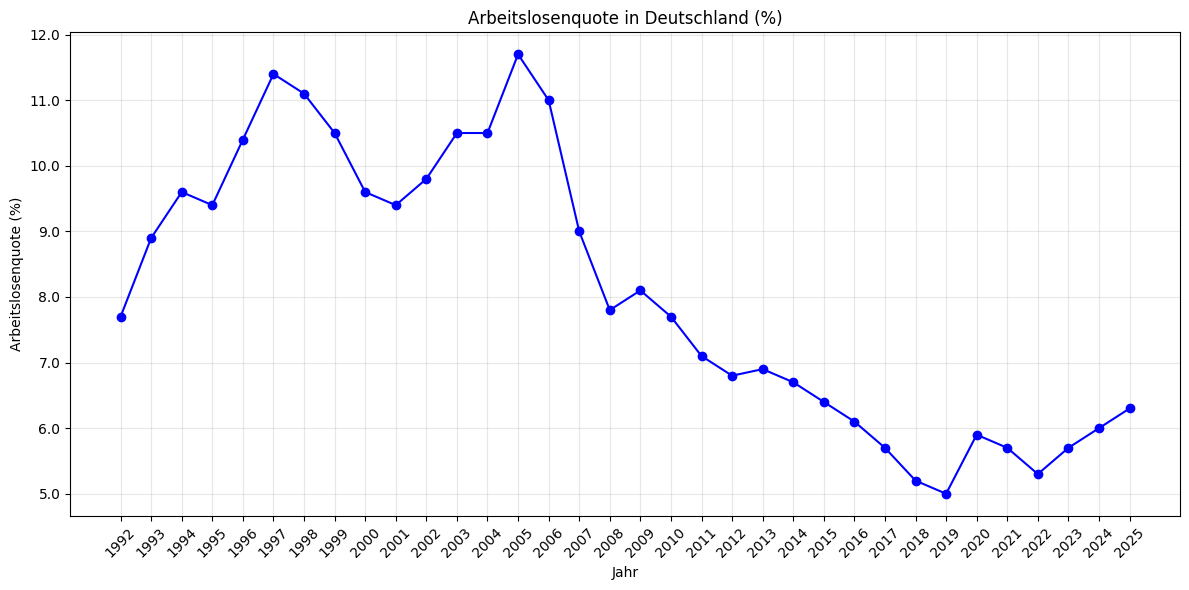

In [198]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


df["Unemployed Rate %"] = df["Unemployed Rate %"].astype(str).str.replace(",", ".").astype(float)


df["Year"] = pd.to_numeric(df["Year"], errors='coerce')
df = df.dropna(subset=["Year", "Unemployed Rate %"])


plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Unemployed Rate %"], marker='o', color='blue')

plt.title("Arbeitslosenquote in Deutschland (%)")
plt.xlabel("Jahr")
plt.ylabel("Arbeitslosenquote (%)")

plt.xticks(df["Year"], rotation=45)


plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x:.1f}"))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Quelle: Destatis, eigene Darstellung

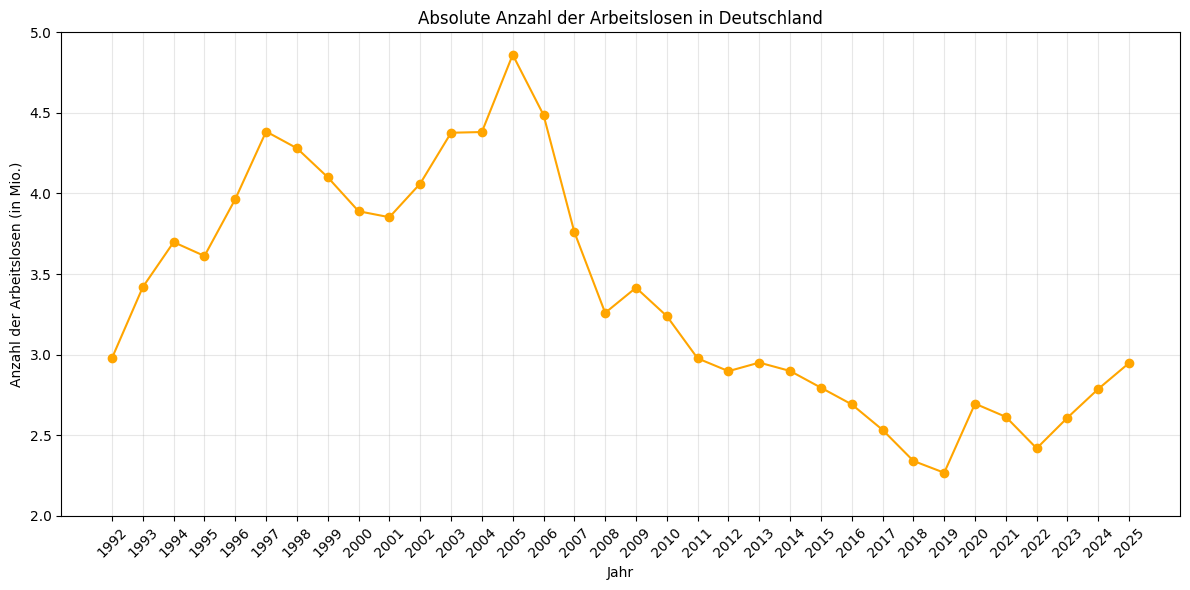

In [199]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df["Unemployed number"] = df["Unemployed number"].astype(str).str.replace(",", "").astype(float)

df["Year"] = pd.to_numeric(df["Year"], errors='coerce')

df = df.dropna(subset=["Year", "Unemployed number"])

plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Unemployed number"], marker='o', color='orange')

plt.title("Absolute Anzahl der Arbeitslosen in Deutschland")
plt.xlabel("Jahr")
plt.ylabel("Anzahl der Arbeitslosen (in Mio.)")

plt.xticks(df["Year"], rotation=45)
plt.ylim(2_000_000, 5_000_000)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500_000))
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f"{x/1_000_000:.1f}")
)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Quelle: Destatis, eigene Darstellung

## Zusammenhang zwischen Arbeitslosenquote und Anzahl der Arbeitslosen


In [200]:
df[["Unemployed Rate %", "Unemployed number"]].corr()


,Unemployed Rate %,Unemployed number
Unemployed Rate %,1.000000,0.985028
Unemployed number,0.985028,1.000000


Die starke positive Korrelation bestätigt die erwartete Beziehung zwischen Quote und absoluter Anzahl.


## Erkenntnisse

- Die Arbeitslosenquote zeigt langfristig einen rückläufigen Trend, trotz kurzfristiger Schwankungen.
- Die absolute Anzahl der Arbeitslosen bestätigt diesen Trend, reagiert jedoch sensibler auf wirtschaftliche Krisen.
- Die Kombination aus relativer Quote und absoluten Zahlen ermöglicht eine umfassendere Bewertung der Arbeitsmarktlage.


## Fazit

Die Analyse zeigt, dass sich die Arbeitslosigkeit in Deutschland langfristig positiv entwickelt hat.
Durch die Kombination von relativen und absoluten Kennzahlen sowie einfacher statistischer Methoden
konnte ein grundlegendes Verständnis für Arbeitsmarktdaten gewonnen werden.

Dieses Projekt zeigt die Fähigkeit, reale Daten zu importieren, aufbereiten,
statistisch zu analysieren, visuell darzustellen und sinnvolle Schlussfolgerungen zu ziehen.